<a href="https://colab.research.google.com/github/rukmals/crowd-monitoring-system-model-development/blob/main/gt_checking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random
import os
from PIL import Image,ImageFilter,ImageDraw
import numpy as np
import h5py
from PIL import ImageStat
import glob
from sklearn.model_selection import train_test_split
import json

import sys
import warnings
# import from library
import torch
import torch.nn as nn
from torch.autograd import Variable
from torchvision import datasets, transforms
import numpy as np
import argparse
import json
import cv2
import time
from torchvision import models

In [114]:
def load_data(img_path,train = True):
    gt_path = img_path.replace('.png','.h5').replace('pngs','GT')
    img = Image.open(img_path).convert('RGB')
    gt_file = h5py.File(gt_path, 'r')
    target = np.asarray(gt_file['density'])
    print(target.shape)
    target = cv2.resize(target,(int(target.shape[1]/2.25), int(target.shape[0]/2.25)),interpolation = cv2.INTER_CUBIC)*5.064
    print(target.shape)

    return img,target

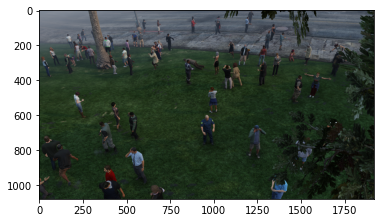

In [65]:
img_path = "/content/drive/MyDrive/GCC/Part 0/scene_09_3/pngs/1531113922.png"
from matplotlib import pyplot as plt
from matplotlib import cm as CM
import PIL.Image as Image
#now see a sample from ShanghaiA
plt.imshow(Image.open(img_path))

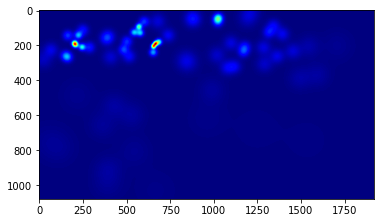

In [66]:
density_map_path = "/content/drive/MyDrive/GCC/Part 0/scene_09_3/GT/1531113922.h5"
import h5py
gt_file = h5py.File(density_map_path,'r')
groundtruth = np.asarray(gt_file['density'])

plt.imshow(groundtruth,cmap=CM.jet)

In [102]:
np.sum(groundtruth)

65.48214

In [115]:
im , target = load_data(img_path)

(1080, 1920)
(480, 853)


In [116]:
np.sum(target)

65.47598

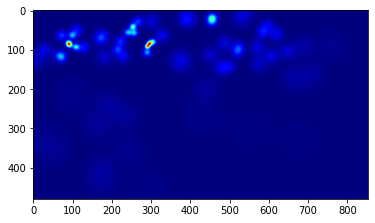

In [83]:
plt.imshow(target,cmap=CM.jet)